<h2>Generate Test Data</h2>

Optimal Window Size: 60


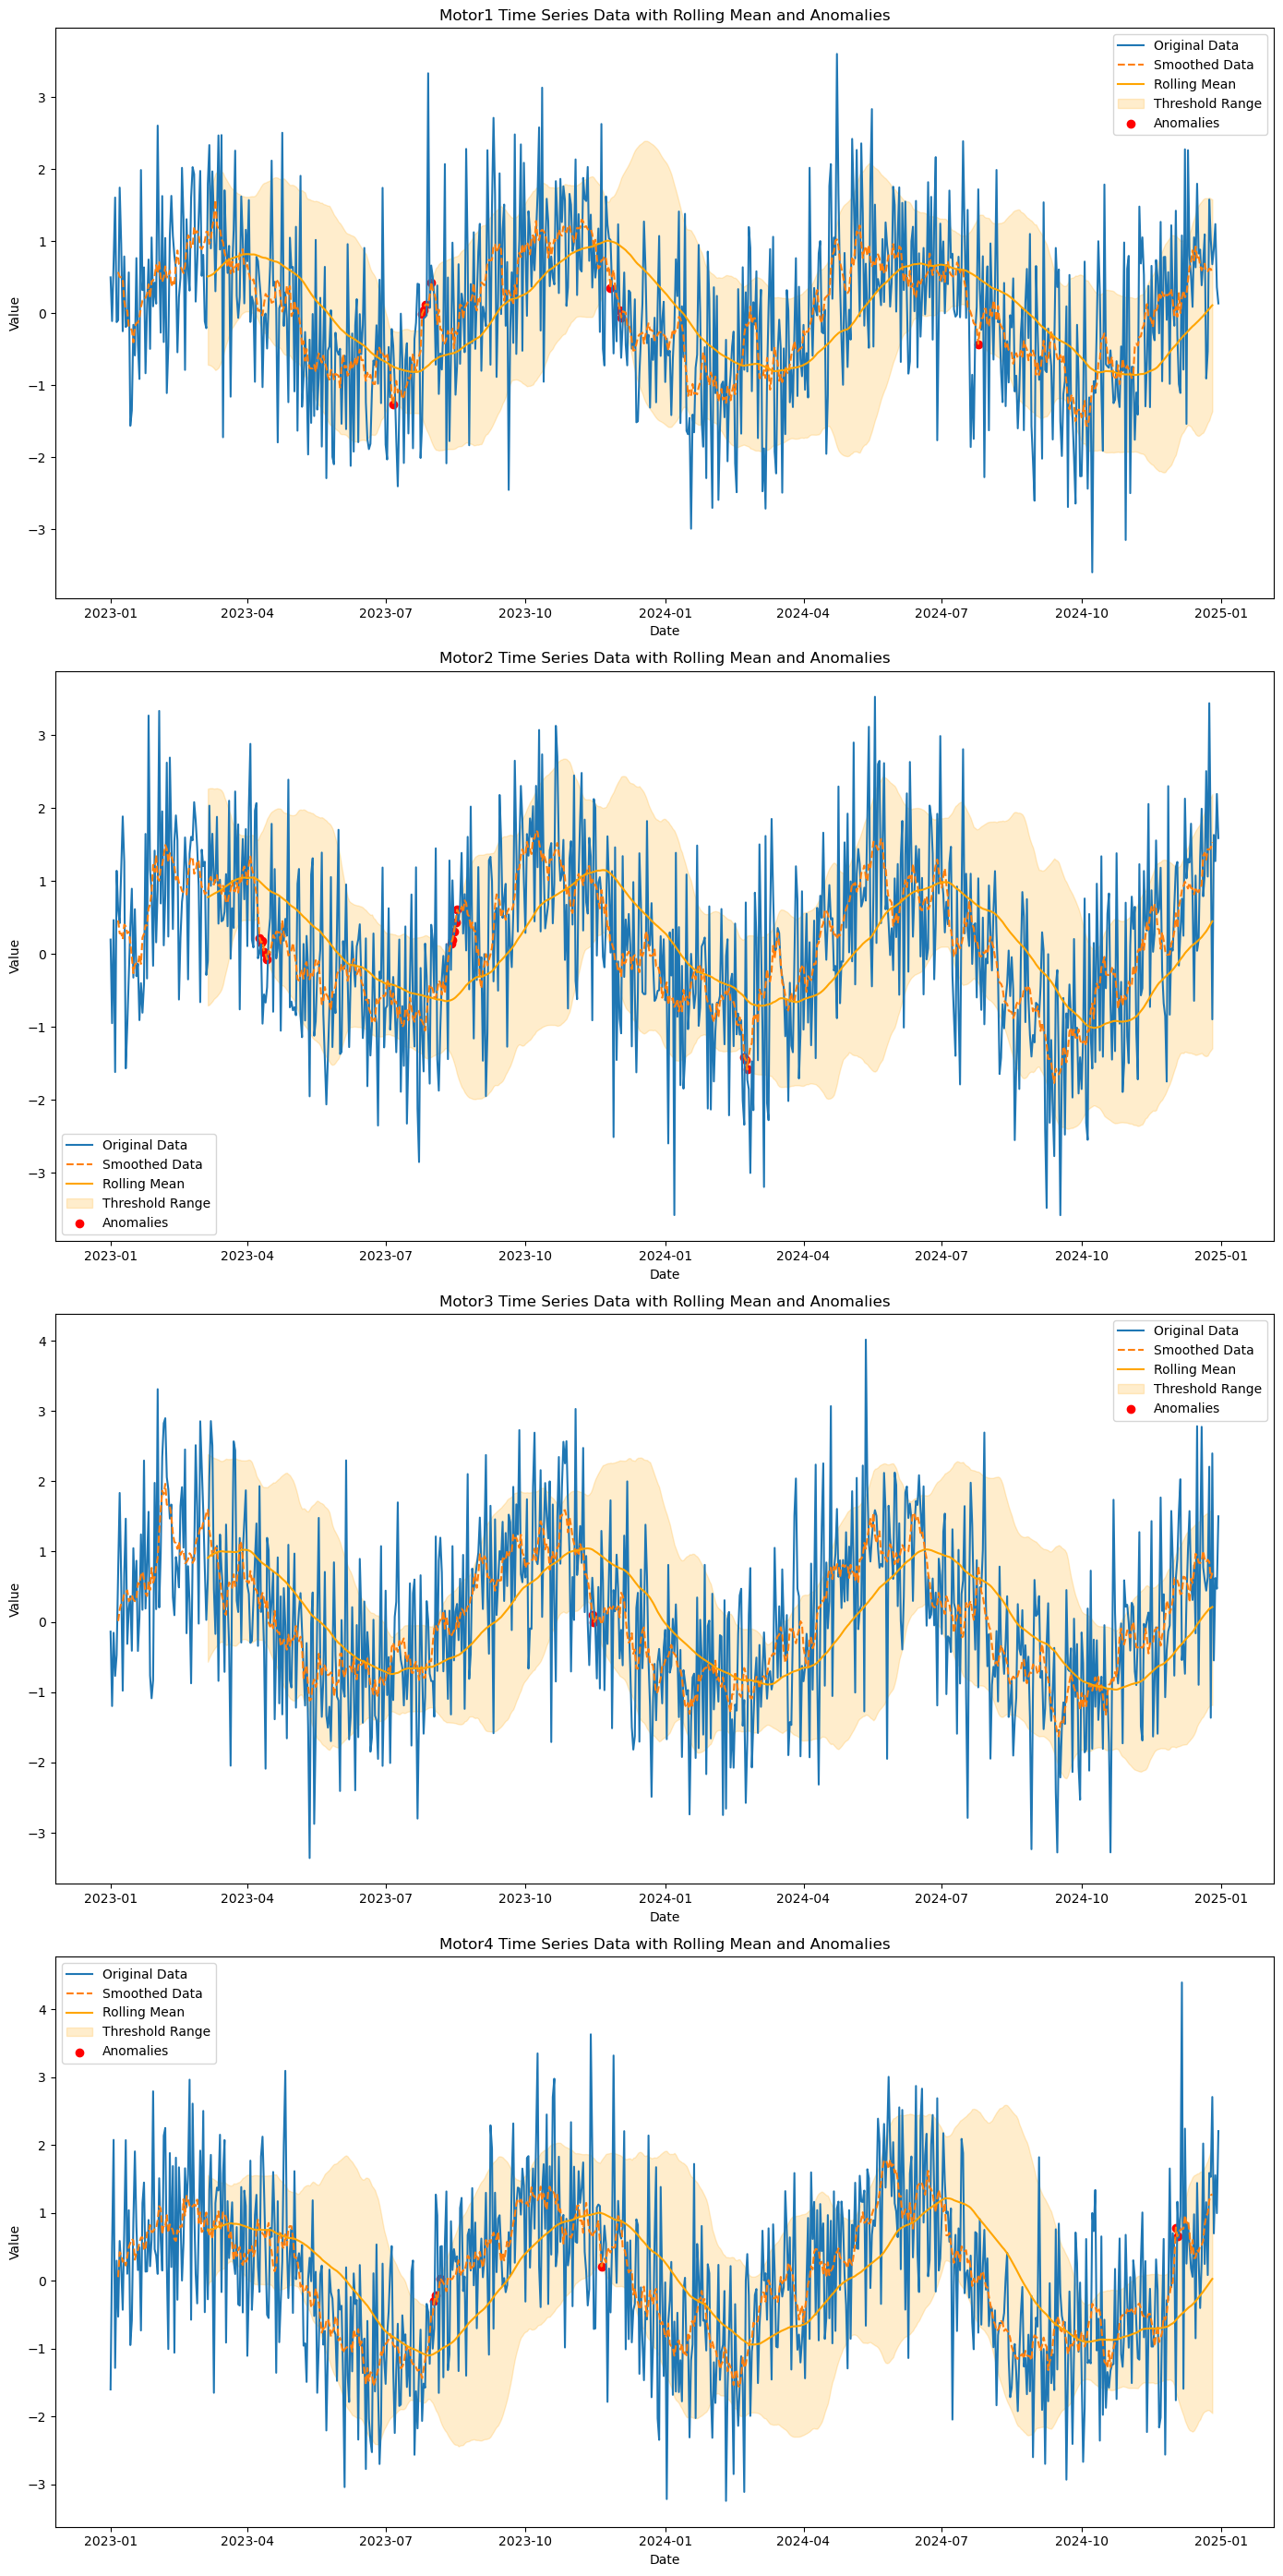


Explanation:
1. Artificial time series data is generated for four motor signals with a combination of random noise and a sine wave.
2. A DataFrame is created for each motor signal with the date as the index and the generated values.
3. Smoothing is applied to the data using a moving average to reduce noise.
4. A function calculates the rolling mean, rolling standard deviation, and Z-score of the smoothed data. Anomalies are detected based on the Z-score threshold.
5. The window size is optimized by iterating over a range of window sizes and scoring the performance of anomaly detection. The score is based on the proportion of detected anomalies.
6. The optimal window size is used to detect anomalies for each motor signal.
7. The time series data, smoothed data, rolling mean, threshold range, and detected anomalies are plotted using Matplotlib.



In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate artificial time series data for four motor signals
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=(365 * 2), freq='D')
signals = {
    'motor1': np.random.normal(loc=0, scale=1, size=len(dates)) + np.sin(np.linspace(0, 20, len(dates))),
    'motor2': np.random.normal(loc=0, scale=1, size=len(dates)) + np.sin(np.linspace(0, 20, len(dates))),
    'motor3': np.random.normal(loc=0, scale=1, size=len(dates)) + np.sin(np.linspace(0, 20, len(dates))),
    'motor4': np.random.normal(loc=0, scale=1, size=len(dates)) + np.sin(np.linspace(0, 20, len(dates))),
}

# Create a DataFrame for each motor
dfs = {motor: pd.DataFrame({'date': dates, 'value': values}) for motor, values in signals.items()}
for df in dfs.values():
    df.set_index('date', inplace=True)

# Apply smoothing to the data
for motor, df in dfs.items():
    df['smoothed_value'] = df['value'].rolling(window=10, center=True).mean()

# Function to calculate rolling statistics and detect anomalies using Z-score
def detect_anomalies(df, window_size, z_threshold):
    df['rolling_mean'] = df['smoothed_value'].rolling(window=window_size).mean()
    df['rolling_std'] = df['smoothed_value'].rolling(window=window_size).std()
    df['z_score'] = (df['smoothed_value'] - df['rolling_mean']) / df['rolling_std']
    df['anomaly'] = np.abs(df['z_score']) > z_threshold
    return df

# Function to score the anomaly detection
def score_anomaly_detection(df):
    num_anomalies = df['anomaly'].sum()
    total_points = len(df)
    proportion_anomalies = num_anomalies / total_points
    # The optimal proportion can be set based on domain knowledge or experimentation
    optimal_proportion = 0.05  # 5% anomalies
    score = abs(proportion_anomalies - optimal_proportion)
    return score

# Parameters for anomaly detection
z_threshold = 3.0  # Z-score threshold for detecting anomalies

# Optimize window size
best_window_size = None
best_score = float('inf')

for window_size in range(5, 101, 5):
    total_score = 0
    for motor, df in dfs.items():
        df_temp = detect_anomalies(df.copy(), window_size, z_threshold)
        total_score += score_anomaly_detection(df_temp)
    avg_score = total_score / len(dfs)
    if avg_score < best_score:
        best_score = avg_score
        best_window_size = window_size

print(f'Optimal Window Size: {best_window_size}')

# Detect anomalies using the optimal window size
for motor, df in dfs.items():
    dfs[motor] = detect_anomalies(df, best_window_size, z_threshold)

# Plot the results using Matplotlib
fig, axs = plt.subplots(4, 1, figsize=(14, 28))

for idx, (motor, df) in enumerate(dfs.items()):
    axs[idx].plot(df.index, df['value'], label='Original Data')
    axs[idx].plot(df.index, df['smoothed_value'], label='Smoothed Data', linestyle='--')
    axs[idx].plot(df.index, df['rolling_mean'], label='Rolling Mean', color='orange')
    axs[idx].fill_between(df.index, df['rolling_mean'] + z_threshold * df['rolling_std'],
                          df['rolling_mean'] - z_threshold * df['rolling_std'], color='orange', alpha=0.2, label='Threshold Range')
    axs[idx].scatter(df.index[df['anomaly']], df['smoothed_value'][df['anomaly']], color='red', label='Anomalies')
    axs[idx].set_title(f'{motor.capitalize()} Time Series Data with Rolling Mean and Anomalies')
    axs[idx].set_xlabel('Date')
    axs[idx].set_ylabel('Value')
    axs[idx].legend()

plt.tight_layout()
plt.show()

# Explanation of the implementation
print("""
Explanation:
1. Artificial time series data is generated for four motor signals with a combination of random noise and a sine wave.
2. A DataFrame is created for each motor signal with the date as the index and the generated values.
3. Smoothing is applied to the data using a moving average to reduce noise.
4. A function calculates the rolling mean, rolling standard deviation, and Z-score of the smoothed data. Anomalies are detected based on the Z-score threshold.
5. The window size is optimized by iterating over a range of window sizes and scoring the performance of anomaly detection. The score is based on the proportion of detected anomalies.
6. The optimal window size is used to detect anomalies for each motor signal.
7. The time series data, smoothed data, rolling mean, threshold range, and detected anomalies are plotted using Matplotlib.
""")


In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Generate artificial time series data for motor 4
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=(365 * 2), freq='D')
motor4_values = np.random.normal(loc=0, scale=1, size=len(dates)) + np.sin(np.linspace(0, 20, len(dates)))

# Create a DataFrame for motor 4
df_motor4 = pd.DataFrame({'date': dates, 'value': motor4_values})
df_motor4.set_index('date', inplace=True)

# Apply smoothing to the data
df_motor4['smoothed_value'] = df_motor4['value'].rolling(window=20, center=True).mean()

# Function to calculate rolling statistics and detect anomalies using Z-score
def detect_anomalies(df, window_size, z_threshold):
    df['rolling_mean'] = df['smoothed_value'].rolling(window=window_size).mean()
    df['rolling_std'] = df['smoothed_value'].rolling(window=window_size).std()
    df['z_score'] = (df['smoothed_value'] - df['rolling_mean']) / df['rolling_std']
    df['anomaly'] = np.abs(df['z_score']) > z_threshold
    return df

# Function to score the anomaly detection
def score_anomaly_detection(df):
    num_anomalies = df['anomaly'].sum()
    total_points = len(df)
    proportion_anomalies = num_anomalies / total_points
    # The optimal proportion can be set based on domain knowledge or experimentation
    optimal_proportion = 0.05  # 5% anomalies
    score = abs(proportion_anomalies - optimal_proportion)
    return score

# Parameters for anomaly detection
z_threshold = 3.0  # Z-score threshold for detecting anomalies

# Optimize window size
best_window_size = None
best_score = float('inf')

for window_size in range(5, 101, 5):
    df_temp = detect_anomalies(df_motor4.copy(), window_size, z_threshold)
    score = score_anomaly_detection(df_temp)
    if score < best_score:
        best_score = score
        best_window_size = window_size

print(f'Optimal Window Size: {best_window_size}')

# Detect anomalies using the optimal window size
df_motor4 = detect_anomalies(df_motor4, best_window_size, z_threshold)

# Color scheme
colors = {
    'original': '#F4A261',
    'smoothed': '#2A9D8F',
    'rolling_mean': '#8AB17D',
    'threshold_range': '#E76F51',
    'anomalies': '#E76F51',
    'background': '#264653'
}

# Plot 1: Original Data
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['value'], mode='lines', name='Original Data',
                          line=dict(color=colors['original'])))
fig1.update_layout(title='Motor4 Original Data', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig1.show()

# Plot 2: Smoothed Data
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['value'], mode='lines', name='Original Data',
                          line=dict(color=colors['original'])))
fig2.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['smoothed_value'], mode='lines', name='Smoothed Data',
                          line=dict(color=colors['smoothed'], dash='dash')))
fig2.update_layout(title='Motor4 Smoothed Data', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig2.show()

# Plot 3: Rolling Mean and Threshold Range
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['smoothed_value'], mode='lines', name='Smoothed Data',
                          line=dict(color=colors['smoothed'], dash='dash')))
fig3.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['rolling_mean'], mode='lines', name='Rolling Mean',
                          line=dict(color=colors['rolling_mean'])))
fig3.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['rolling_mean'] + z_threshold * df_motor4['rolling_std'], fill=None, mode='lines',
                          line=dict(color=colors['threshold_range'], width=0)))
fig3.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['rolling_mean'] - z_threshold * df_motor4['rolling_std'], fill='tonexty', mode='lines',
                          line=dict(color=colors['threshold_range'], width=0), fillcolor='rgba(231, 111, 81, 0.2)'))
fig3.update_layout(title='Motor4 Rolling Mean and Threshold Range', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig3.show()

# Plot 4: Detected Anomalies
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['smoothed_value'], mode='lines', name='Smoothed Data',
                          line=dict(color=colors['smoothed'], dash='dash')))
fig4.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['rolling_mean'], mode='lines', name='Rolling Mean',
                          line=dict(color=colors['rolling_mean'])))
fig4.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['rolling_mean'] + z_threshold * df_motor4['rolling_std'], fill=None, mode='lines',
                          line=dict(color=colors['threshold_range'], width=0)))
fig4.add_trace(go.Scatter(x=df_motor4.index, y=df_motor4['rolling_mean'] - z_threshold * df_motor4['rolling_std'], fill='tonexty', mode='lines',
                          line=dict(color=colors['threshold_range'], width=0), fillcolor='rgba(231, 111, 81, 0.2)'))
fig4.add_trace(go.Scatter(x=df_motor4.index[df_motor4['anomaly']], y=df_motor4['smoothed_value'][df_motor4['anomaly']], mode='markers', name='Anomalies',
                          marker=dict(color=colors['anomalies'], size=10)))
fig4.update_layout(title='Motor4 Detected Anomalies', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig4.show()

# Explanation of the implementation
print("""
Explanation:
1. Artificial time series data is generated for motor 4 with a combination of random noise and a sine wave.
2. A DataFrame is created for motor 4 with the date as the index and the generated values.
3. Smoothing is applied to the data using a moving average to reduce noise.
4. A function calculates the rolling mean, rolling standard deviation, and Z-score of the smoothed data. Anomalies are detected based on the Z-score threshold.
5. The window size is optimized by iterating over a range of window sizes and scoring the performance of anomaly detection. The score is based on the proportion of detected anomalies.
6. The optimal window size is used to detect anomalies for motor 4.
7. The time series data, smoothed data, rolling mean, threshold range, and detected anomalies are plotted individually using Plotly.
""")


Optimal Window Size: 70



Explanation:
1. Artificial time series data is generated for motor 4 with a combination of random noise and a sine wave.
2. A DataFrame is created for motor 4 with the date as the index and the generated values.
3. Smoothing is applied to the data using a moving average to reduce noise.
4. A function calculates the rolling mean, rolling standard deviation, and Z-score of the smoothed data. Anomalies are detected based on the Z-score threshold.
5. The window size is optimized by iterating over a range of window sizes and scoring the performance of anomaly detection. The score is based on the proportion of detected anomalies.
6. The optimal window size is used to detect anomalies for motor 4.
7. The time series data, smoothed data, rolling mean, threshold range, and detected anomalies are plotted individually using Plotly.



<h2>Real Sample Data</h2>

In [139]:
dataframes = [pd.read_csv("data/" + i) for i in os.listdir(r"data") if "csv" in i.lower()]

df = pd.concat(dataframes, axis = 0).reset_index(drop = True)
df.columns = [i.lower().strip()  for i in df.columns]
df = df.sort_values(by = "time (s)")
df.index = df['time (s)'].to_list()
df = df.drop("time (s)", axis = 1)

# df = df.iloc[:3000]

In [ ]:
# Function to calculate rolling statistics and detect anomalies using Z-score
def detect_anomalies(df, column, window_size, z_threshold):
    df['smoothed_value'] = df[column].rolling(window=5, center=True).mean()
    df['rolling_mean'] = df['smoothed_value'].rolling(window=window_size).mean()
    df['rolling_std'] = df['smoothed_value'].rolling(window=window_size).std()
    df['z_score'] = (df['smoothed_value'] - df['rolling_mean']) / df['rolling_std']
    df['anomaly'] = np.abs(df['z_score']) > z_threshold
    return df

# Parameters for anomaly detection
z_threshold = 5.0  # Z-score threshold for detecting anomalies
window_size = 100  # Example window size

# Apply anomaly detection to motor[0] as an example
df_motor = detect_anomalies(df.copy(), 'motor[0]', window_size, z_threshold)

# Color scheme
colors = {
    'original': '#F4A261',
    'smoothed': '#2A9D8F',
    'rolling_mean': '#8AB17D',
    'threshold_range': '#E76F51',
    'anomalies': '#E76F51',
    'background': '#264653'
}

# Plot 1: Original Data
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_motor.index, y=df_motor['motor[0]'], mode='lines', name='Original Data',
                          line=dict(color=colors['original'])))
fig1.update_layout(title='Motor3 Original Data', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig1.show()

# Plot 2: Smoothed Data
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_motor.index, y=df_motor['motor[0]'], mode='lines', name='Original Data',
                          line=dict(color=colors['original'])))
fig2.add_trace(go.Scatter(x=df_motor.index, y=df_motor['smoothed_value'], mode='lines', name='Smoothed Data',
                          line=dict(color=colors['smoothed'], dash='dash')))
fig2.update_layout(title='Motor3 Smoothed Data', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig2.show()

# Plot 3: Rolling Mean and Threshold Range
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['smoothed_value'], mode='lines', name='Smoothed Data',
                          line=dict(color=colors['smoothed'], dash='dash')))
fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'], mode='lines', name='Rolling Mean',
                          line=dict(color=colors['rolling_mean'])))
fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] + z_threshold * df_motor['rolling_std'], fill=None, mode='lines',
                          line=dict(color=colors['threshold_range'], width=0)))
fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] - z_threshold * df_motor['rolling_std'], fill='tonexty', mode='lines',
                          line=dict(color=colors['threshold_range'], width=0), fillcolor='rgba(231, 111, 81, 0.2)'))
fig3.update_layout(title='Motor3 Rolling Mean and Threshold Range', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig3.show()

# Plot 4: Detected Anomalies
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['smoothed_value'], mode='lines', name='Smoothed Data',
                          line=dict(color=colors['smoothed'], dash='dash')))
fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'], mode='lines', name='Rolling Mean',
                          line=dict(color=colors['rolling_mean'])))
fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] + z_threshold * df_motor['rolling_std'], fill=None, mode='lines',
                          line=dict(color=colors['threshold_range'], width=0)))
fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] - z_threshold * df_motor['rolling_std'], fill='tonexty', mode='lines',
                          line=dict(color=colors['threshold_range'], width=0), fillcolor='rgba(231, 111, 81, 0.2)'))
fig4.add_trace(go.Scatter(x=df_motor.index[df_motor['anomaly']], y=df_motor['smoothed_value'][df_motor['anomaly']], mode='markers', name='Anomalies',
                          marker=dict(color=colors['anomalies'], size=10)))
fig4.update_layout(title='Motor3 Detected Anomalies', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
fig4.show()

# Explanation of the implementation
print("""
Explanation:
1. Provided time series data for motor[0] from the DataFrame.
2. Applied smoothing to the data using a moving average to reduce noise.
3. Calculated the rolling mean, rolling standard deviation, and Z-score of the smoothed data. Detected anomalies based on the Z-score threshold.
4. Plotted each step individually using Plotly.
""")

In [138]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import precision_score, recall_score

# Function to calculate rolling statistics and detect anomalies using Z-score
def detect_anomalies(df, column, window_size, z_threshold):
    df['smoothed_value'] = df[column].rolling(window=5, center=True).mean()
    df['rolling_mean'] = df['smoothed_value'].rolling(window=window_size).mean()
    df['rolling_std'] = df['smoothed_value'].rolling(window=window_size).std()
    df['z_score'] = (df['smoothed_value'] - df['rolling_mean']) / df['rolling_std']
    df['anomaly'] = np.abs(df['z_score']) > z_threshold
    return df

# Function to evaluate the anomaly detection
def evaluate_anomalies(df, motor_columns, window_size, z_threshold):
    total_anomalies = 0
    for motor in motor_columns:
        df_temp = detect_anomalies(df.copy(), motor, window_size, z_threshold)
        total_anomalies += df_temp['anomaly'].sum()
    return total_anomalies / len(df)  # Normalized anomaly score

# Grid search parameters
window_sizes = range(50, 2501, 50)
z_thresholds = np.arange(1.0, 6.0, 0.2)
motor_columns = ['motor[0]', 'motor[1]', 'motor[2]', 'motor[3]']

best_params = {'window_size': None, 'z_threshold': None, 'anomaly_score': float('inf')}

# Perform grid search
for window_size in window_sizes:
    for z_threshold in z_thresholds:
        anomaly_score = evaluate_anomalies(df, motor_columns, window_size, z_threshold)
        if anomaly_score < best_params['anomaly_score']:
            best_params['window_size'] = window_size
            best_params['z_threshold'] = z_threshold
            best_params['anomaly_score'] = anomaly_score

print(f"Optimal window size: {best_params['window_size']}")
print(f"Optimal Z-score threshold: {best_params['z_threshold']}")
print(f"Lowest anomaly score: {best_params['anomaly_score']}")

# Apply anomaly detection using the best parameters
window_size = best_params['window_size']
z_threshold = best_params['z_threshold']

# Color scheme
colors = {
    'original': '#F4A261',
    'smoothed': '#2A9D8F',
    'rolling_mean': '#8AB17D',
    'threshold_range': '#E76F51',
    'anomalies': '#E76F51',
    'background': '#264653'
}

# Plot results for each motor column
for motor in motor_columns:
    df_motor = detect_anomalies(df.copy(), motor, window_size, z_threshold)

    # Plot 1: Original Data
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=df_motor.index, y=df_motor[motor], mode='lines', name='Original Data',
                              line=dict(color=colors['original'])))
    fig1.update_layout(title=f'{motor} Original Data', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
    fig1.show()

    # Plot 2: Smoothed Data
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=df_motor.index, y=df_motor[motor], mode='lines', name='Original Data',
                              line=dict(color=colors['original'])))
    fig2.add_trace(go.Scatter(x=df_motor.index, y=df_motor['smoothed_value'], mode='lines', name='Smoothed Data',
                              line=dict(color=colors['smoothed'], dash='dash')))
    fig2.update_layout(title=f'{motor} Smoothed Data', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
    fig2.show()

    # Plot 3: Rolling Mean and Threshold Range
    fig3 = go.Figure()
    fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['smoothed_value'], mode='lines', name='Smoothed Data',
                              line=dict(color=colors['smoothed'], dash='dash')))
    fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'], mode='lines', name='Rolling Mean',
                              line=dict(color=colors['rolling_mean'])))
    fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] + z_threshold * df_motor['rolling_std'], fill=None, mode='lines',
                              line=dict(color=colors['threshold_range'], width=0)))
    fig3.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] - z_threshold * df_motor['rolling_std'], fill='tonexty', mode='lines',
                              line=dict(color=colors['threshold_range'], width=0), fillcolor='rgba(231, 111, 81, 0.2)'))
    fig3.update_layout(title=f'{motor} Rolling Mean and Threshold Range', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
    fig3.show()

    # Plot 4: Detected Anomalies
    fig4 = go.Figure()
    fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['smoothed_value'], mode='lines', name='Smoothed Data',
                              line=dict(color=colors['smoothed'], dash='dash')))
    fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'], mode='lines', name='Rolling Mean',
                              line=dict(color=colors['rolling_mean'])))
    fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] + z_threshold * df_motor['rolling_std'], fill=None, mode='lines',
                              line=dict(color=colors['threshold_range'], width=0)))
    fig4.add_trace(go.Scatter(x=df_motor.index, y=df_motor['rolling_mean'] - z_threshold * df_motor['rolling_std'], fill='tonexty', mode='lines',
                              line=dict(color=colors['threshold_range'], width=0), fillcolor='rgba(231, 111, 81, 0.2)'))
    fig4.add_trace(go.Scatter(x=df_motor.index[df_motor['anomaly']], y=df_motor['smoothed_value'][df_motor['anomaly']], mode='markers', name='Anomalies',
                              marker=dict(color=colors['anomalies'], size=10)))
    fig4.update_layout(title=f'{motor} Detected Anomalies', template='plotly_dark', paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
    fig4.show()

# Explanation of the implementation
print("""
Explanation:
1. Provided time series data for motor[0], motor[1], motor[2], and motor[3] from the DataFrame.
2. Applied smoothing to the data using a moving average to reduce noise.
3. Performed a grid search to optimize the window size and Z-score threshold based on the anomaly score.
4. Calculated the rolling mean, rolling standard deviation, and Z-score of the smoothed data. Detected anomalies based on the optimized Z-score threshold.
5. Plotted each step individually for each motor using Plotly.
""")


Optimal window size: 1950
Optimal Z-score threshold: 4.799999999999999
Lowest anomaly score: 0.0



Explanation:
1. Provided time series data for motor[0], motor[1], motor[2], and motor[3] from the DataFrame.
2. Applied smoothing to the data using a moving average to reduce noise.
3. Performed a grid search to optimize the window size and Z-score threshold based on the anomaly score.
4. Calculated the rolling mean, rolling standard deviation, and Z-score of the smoothed data. Detected anomalies based on the optimized Z-score threshold.
5. Plotted each step individually for each motor using Plotly.

